## Implement Trie

In [2]:
class TrieNode:
    
    def __init__(self):
        self.map = {}
        self.isWord = False
        
class Trie:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = TrieNode()

    def insert(self, word):
        """
        Inserts a word into the trie.
        """
        current = self.root
        for letter in word:
            if letter not in current.map:
                current.map[letter] = TrieNode()
            current = current.map[letter]
        current.isWord = True
        

    def search(self, word):
        """
        Returns if the word is in the trie.
        """
        current = self.root
        for letter in word:
            if letter not in current.map:
                return False
            current = current.map[letter]
        return current.isWord

    def startsWith(self, prefix):
        """
        Returns if there is any word in the trie that starts with the given prefix.
        """
        current = self.root
        for letter in prefix:
            if letter not in current.map:
                return False
            current = current.map[letter]
        return True
    
    def delete(self, word):
        if not word:return  
        lastNode = self.getLastNode(word)
        if lastNode is None: return
        lastNode.isWord = False
        if len(lastNode.map)>0: return
        self.delete_helper(word)
        
    def getLastNode(self, word):
        current = self.root
        for letter in word:
            if letter not in current.map:
                return
            current = current.map[letter]
        return current
    
    def delete_helper(self, word):
        node_with_mul_children = None
        child_to_break = None
        current = self.root
        for i, letter in enumerate(word):
            if letter not in current.map:
                return
            current = current.map[letter]
            if len(current.map)>1 or current.isWord:
                node_with_mul_children = current
                child_to_break = word[i+1]
        if node_with_mul_children is not None:
            del node_with_mul_children.map[child_to_break]
        else:
            del self.root.map[word[0]]
        
        

In [4]:
trie = Trie()

In [8]:
trie.insert("cat")
trie.insert("dog")
trie.insert("dot")
trie.insert("dots")
trie.insert("does")
trie.search("cat")

True

In [9]:
trie.search("dog")

True

In [10]:
trie.startsWith("ca")

True

In [12]:
trie.delete('dog')
trie.search('dog')

False

In [13]:
trie.delete('dots')
trie.search('dots')

False

In [14]:
trie.search('dot')

True

In [15]:
trie.search('does')

True

### Word Search II
Given a 2D board and a list of words from the dictionary, find all words in the board.

Each word must be constructed from letters of sequentially adjacent cell, where "adjacent" cells are those horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.


Example:

* Input: 
board = [
  ['o','a','a','n'],
  ['e','t','a','e'],
  ['i','h','k','r'],
  ['i','f','l','v']
]
* words = ["oath","pea","eat","rain"]
* Output: ["eat","oath"]

In [10]:
class Solution:
    def findWords(self, board, words):
        trie = Trie(); ans = set(); visited = set()
        for word in words:
            trie.insert(word)
        for i in range(len(board)):
            for j in range(len(board[0])):
                self.helper(board, i, j, trie.root, visited, ans, '')
        return list(ans)
    
    def helper(self, board, i, j, node, visited, ans, word):
        if i<0 or i>=len(board) or j<0 or j>=len(board[0]) or (i,j) in visited:
            return
        word += board[i][j]
        
        if word[-1] not in node.map:
            return
        node = node.map[word[-1]]
        
        if node.isWord:
            ans.add(word)
            
        visited.add((i,j))
        for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            self.helper(board, x, y, node, visited, ans, word)
        visited.remove((i,j))

obj = Solution()
board = [['o','a','a','n'], ['e','t','a','e'], ['i','h','k','r'], ['i','f','l','v']]
words = ["oath","pea","eat","rain"]
obj.findWords(board, words)

['eat', 'oath']

### Longest Word in Dictionary

Given a list of strings words representing an English Dictionary, find the longest word in words that can be built one character at a time by other words in words. If there is more than one possible answer, return the longest word with the smallest lexicographical order.

If there is no answer, return the empty string.

* Input: words = ["a", "banana", "app", "appl", "ap", "apply", "apple"]
* Output: "apple"
* Explanation:  Both "apply" and "apple" can be built from other words in the dictionary. However, "apple" is lexicographically smaller than "apply".

In [10]:
class Solution:
    def longestWord(self, words) -> str:
        trie = Trie()
        for word in words:
            trie.insert(word)
        self.ans = ''
        self.helper(trie.root, '')
        return self.ans
    
    def helper(self, node, string):
        if not node.isWord:
            return
        
        if len(string) > len(self.ans):
            self.ans = string
        elif len(string) == len(self.ans):
            self.ans = min(self.ans, string)
        
        for child in node.map.values():
            self.helper(child, string + child.letter)

class Trie:
    def __init__(self):
        self.root = Node('')
        self.root.isWord = True
    
    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.map:
                node.map[ch] = Node(ch)
            node = node.map[ch]
        node.isWord = True
    
class Node:
    def __init__(self, letter):
        self.map = {}
        self.letter = letter
        self.isWord = False
        
        
words = ["a", "banana", "app", "appl", "ap", "apply", "apple"]
Solution().longestWord(words)

'apple'

### Add and Search Word - Data Structure Design
Design a data structure that supports the following two operations:

* void addWord(word)
* bool search(word)
search(word) can search a literal word or a regular expression string containing only letters a-z or .. A . means it can represent any one letter.

Example:

* addWord("bad")
* addWord("dad")
* addWord("mad")
* search("pad") -> false
* search("bad") -> true
* search(".ad") -> true
* search("b..") -> true

In [ ]:
class WordDictionary:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.trie = Trie()

    def addWord(self, word: str) -> None:
        """
        Adds a word into the data structure.
        """
        current = self.trie.root
        for letter in word:
            if letter not in current.map:
                current.map[letter] = TrieNode()
            current = current.map[letter]
        current.isWord = True

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the data structure. A word could contain the dot character '.' 
        to represent any one letter.
        """
        self.res = False
        self.dfs(self.trie.root, word)
        return self.res
    
    def dfs(self, node, word):
        if not word:
            if node.isWord:
                self.res = True
            return
        
        if word[0] == '.':
            for child in node.map.values():
                self.dfs(child, word[1:])
        else:
            if word[0] not in node.map:
                return
            child = node.map[word[0]]
            self.dfs(child, word[1:])
        
class TrieNode:
    def __init__(self):
        self.map = {}
        self.isWord = False
class Trie:
    def __init__(self):
        self.root = TrieNode()

### Concatenated Words
Given a list of words (without duplicates), please write a program that returns all concatenated words in the given list of words.
A concatenated word is defined as a string that is comprised entirely of at least two shorter words in the given array.

Example:
Input: ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]

Output: ["catsdogcats","dogcatsdog","ratcatdogcat"]

Explanation: "catsdogcats" can be concatenated by "cats", "dog" and "cats"; 
 "dogcatsdog" can be concatenated by "dog", "cats" and "dog"; 
"ratcatdogcat" can be concatenated by "rat", "cat", "dog" and "cat".

**Note: Similar to Word Break. Can also be solved using DP (refer recursion and backtracking notebook)**

In [3]:
class Solution:
    def findAllConcatenatedWordsInADict(self, words):
        trie = Trie()
        for word in words:
            trie.insert(word)
        
        result = []
        for word in words:
            if self.helper(word, 0, 0, trie):
                result.append(word)
        return result
    
    def helper(self, word, start_index, count, trie):
        if start_index == len(word):
            return count>1
                
        current = trie.root
        for i in range(start_index, len(word)):
            if word[i] not in current.map:
                return False
            current = current.map[word[i]]
            if current.isWord and self.helper(word, i+1, count+1, trie):
                return True
            
        return False
    
obj = Solution()
words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]
obj.findAllConcatenatedWordsInADict(words)

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

### Stream of Characters
Implement the StreamChecker class as follows:

StreamChecker(words): Constructor, init the data structure with the given words.
query(letter): returns true if and only if for some k >= 1, the last k characters queried (in order from oldest to newest, including this letter just queried) spell one of the words in the given list.
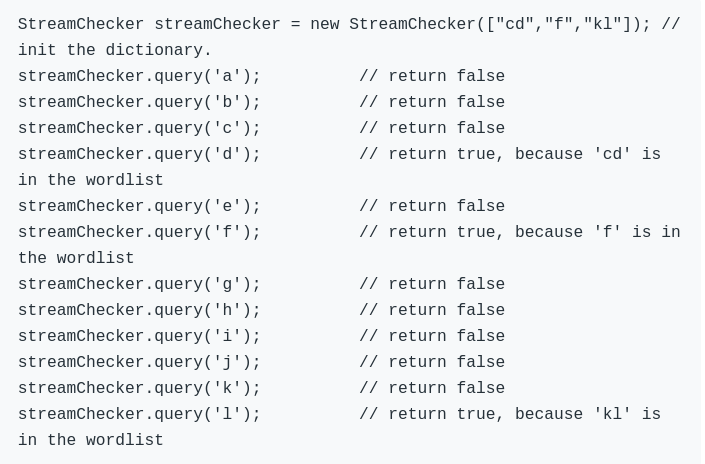

In [1]:
class StreamChecker:

    def __init__(self, words):
        self.trie = Trie()
        for word in words:
            self.trie.add_word(word)
        
        self.stack = []
        

    def query(self, letter: str) -> bool:
        self.stack.append(letter)
        node = self.trie.root
        for i in range(len(self.stack)-1, -1, -1):
            ch = self.stack[i]
            if ch not in node.hashmap:
                return False
            node = node.hashmap[ch]
            if node.isWord: return True
        return False
        
        
class Node:
    def __init__(self):
        self.hashmap = {}
        self.isWord = False
        
class Trie:
    def __init__(self):
        self.root = Node()
    
    def add_word(self, word):
        node = self.root
        for i in range(len(word)-1, -1, -1):
            ch = word[i]
            if ch not in node.hashmap:
                node.hashmap[ch] = Node()
            node = node.hashmap[ch]
        node.isWord = True

### Design Search Autocomplete

In [18]:
import collections
class TrieNode:
    def __init__(self):
        self.map = {}
        self.count = collections.Counter()
        
class AutocompleteSystem:

    def __init__(self, sentences, times):
        self.trie = TrieNode()
        for i in range(len(sentences)):
            self.add(sentences[i], times[i])   
        self.prefix = ''; self.last_node = self.trie

    def input(self, c: str):
        '''
        return top 3 hot sentences
        '''
        if c == '#':
            self.add(self.prefix, 1)
            self.prefix = ''
            self.last_node = self.trie
            return []
        self.prefix += c
        arr_list, self.last_node = self.extract(c)
        return arr_list
    
    def extract(self, ch):
        if self.last_node is None or ch not in self.last_node.map :
            return [], None
        node = self.last_node.map[ch]
            
        res = []; arr_list = []
        for sent, freq in node.count.items():
            res.append((sent, freq))
        res.sort(key=lambda x: (-x[1], x[0]))
        return [sent for sent, freq in res[:3]], node
            
    
    def add(self, sentence, freq):
        node = self.trie
        for ch in sentence:
            if ch not in node.map:
                node.map[ch] = TrieNode()
            node = node.map[ch]
            node.count[sentence] += freq  
    
sentences = ["i love you", "island","ironman", "i love leetcode"]; times = [5,3,2,2]
ac = AutocompleteSystem(sentences, times)
print(ac.input('i'))
print(ac.input(' '))
print(ac.input('b'))
print(ac.input('#'))
print(ac.input('i'))
print(ac.input(' '))

['i love you', 'island', 'i love leetcode']
['i love you', 'i love leetcode']
[]
[]
['i love you', 'island', 'i love leetcode']
['i love you', 'i love leetcode', 'i b']
